<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах(м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.sample(10, random_state=1))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,...,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.0,2,False,...,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.5,2,NaN,...,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.6,1,NaN,...,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.0,3,NaN,...,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0
8363,13,5690000.0,41.7,2016-12-29T00:00:00,2,3.20,5.0,23.0,2,NaN,...,7.5,0.0,Санкт-Петербург,23963.0,3530.0,2.0,352.0,3.0,341.0,283.0
15270,15,4999000.0,42.0,2018-11-23T00:00:00,1,2.80,17.0,22.0,4,NaN,...,11.0,2.0,Санкт-Петербург,30571.0,11470.0,1.0,721.0,0.0,NaN,60.0
2143,4,3350000.0,55.5,2017-11-14T00:00:00,2,NaN,5.0,33.5,3,NaN,...,8.5,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,211.0
11284,17,3200000.0,48.0,2017-10-25T00:00:00,1,2.80,9.0,19.0,4,NaN,...,11.5,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,246.0
17095,8,5100000.0,50.2,2018-10-06T00:00:00,2,2.50,3.0,28.0,1,NaN,...,5.4,NaN,Пушкин,12671.0,24825.0,1.0,171.0,0.0,NaN,23.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23613.000,21796.000,23699.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


### Вывод

По предварительному анализу данных выявлено:
- большое количество пропусков в разных столбцах. На следующем этапе будем их изучать и при необходимости заполнять;
- в столбце 'last_price' найдены аномальные значения - 12190 (слишком низкая цена для квартиры) и 763000000 (слишком высокая цена для квартиры);
- в столбце 'ceiling_height' найдены аномальные значения - 1 (слишком низкая высота потолка) и 100 (слишком высокий потолок);
- аномальные значения убирать на следующем этапе не будем, посмотрим, какое влияние они будут оказывать на этапе 4.

## Предобработка данных

На предыдущем шаге, при анализе данных в столбце 'ceiling_height' было обнаружено очень много пропусков (38,8%). Этот столбец важен для дальнейшего анализа, поэтому необходимо заполнить пропуски.

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Пропуски заполним медианным значением.

In [7]:
df['living_area_part'] = df['living_area'] / df['total_area']
df['kitchen_area_part'] = df['kitchen_area'] / df['total_area']

Для того, чтобы заполнить пропуски в столбцах 'living_area' и 'kitchen_area' добавим новые столбцы 'living_area_part' и 'kitchen_area_part', которые показывают соотношение жилой и общей площади, а также отношение площади кухни к общей. Это необходимо для того, чтобы заполнить пропуски.

In [8]:
for room in df['rooms'].unique():
    df.loc[(df['living_area'].isna())&(df['rooms'] == room), 'living_area'] = \
    df.loc[df['rooms'] == room, 'living_area_part'].median() * df['total_area']

С помощью цикла заполним пропуски в столбце 'living_area' в зависимости от количества комнат и медианного соотношения жилой и общей площади.

In [9]:
df.loc[(df['kitchen_area'].isna())&(df['rooms'] >= 1), 'kitchen_area'] = \
df.loc[df['rooms'] >= 1, 'kitchen_area_part'].median() * df['total_area']

In [10]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['kitchen_area'] = df['kitchen_area'].astype('int')

Заполним пропуски в столбце 'kitchen_area' только для объектов с 1 и более комнатой в зависимости от количества комнат и медианного соотношения площади кухни и общей площади.
Для объектов без комнат зону кухни заполним 0.
После обработки столбца тип данных поменялся на вещественный, заменим его на целочисленный.

In [11]:
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)

Доля пропусков в столбцах 'floors_total' и 'locality_name' крайне мала (менее 0.5%) и такие пропуски никак не заполнить в зависимости от других столбцов. Поэтому было решено их удалить, т.к. это не окажет влияния на результаты анализа.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Столбец 'is_apartment' содержит больше всего пропусков - 88,3%. Заменим их на значение - False.
Информация об апартаментах заполняется пользователем, т.к. обычно эта информация необязательна для заполнения, то большинство пользователей не проставило эту информацию.
Те люди, которые знают, что у них точно апартаменты, указали эту информацию, т.к. эта информация влиет на стоимость объекта.

In [13]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('float') 

Столбец 'balcony' содержит почти 50% пропусков. Заменим их на значение - 0  и поменяем тип данных на float. Информация о количестве балконов заполняется пользователем, т.к. обычно эта информация необязательна для заполнения, то большинство пользователей не проставило эту информацию. Наличие балкона является преимуществом при продаже квартир, поэтому пользователи указывают количество балконов при их наличии и не заполняют информацию о балконах при их отсутствии.

In [14]:
#df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
df['days_exposition'] = df.groupby('locality_name')['days_exposition'].transform(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [15]:
round(df['days_exposition'].isna().mean() * 100, 2)

0.34

In [16]:
df.dropna(subset=['days_exposition'], inplace=True)

Пропуски заполним медианным значением в зависимости от населённого пункта. Оставшиеся строки с пропусками удалим.

In [17]:
df['last_price'] = df['last_price'].astype('int') 

В столбцах 'last_price' вещественный тип данных заменён на целочисленный методом astype() для удобства использования в анализе.

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменили тип данных в столбце с датами публикации объявлений - из строки в дату и время. Это сделано для того, чтобы на следующем шаге добавить столбцы с днем недели, месяцем и годом публикации.

### Вывод

В ходе анализа были выявлены пропуски во многих столбцах, которые было решено исправить.

1) Заполнены пропуски в столбце 'ceiling_height' медианным значением. Пропуски связаны с тем, что высота потолка необязательный атрибут для размещения объявления.

2) Заполнены пропуски в столбцах 'living_area' и 'kitchen_area' в зависимости от количества комнат и медианного соотношения жилой и общей площади, а также площади кухни и общей. Пропуски связаны с тем, что площади необязательные атрибуты для размещения объявления, хотя это важный фактор, на который ориентируются покупатели.

3) Удалены объекты с пропуском в столбцах 'locality_name' и 'floors_total'. Такие пропуски невозможно заполнить корректно и их доля менее 0.5%. Пропуски связаны с некорректным распознанием адреса, ошибками при выгрузке данных или отсутствием информации в базе (например, новый дом). Обычно город и количество этажей в доме проставляется автоматически при правильном адресе.

4) Заполнены пропуски в столбце 'is_apartment' значением False, т.к. если пользователь точно знает, что у него апартаменты, то он укажет это в объявлении, т.к. это влияет на стоимость объекта (цена ниже, чем у квартиры, можно быстрее продать).

5) Заполнены пропуски в столбце 'balcony' значением 0. Количество балконов может тоже влиять на цену, соответственно, при их наличии пользователи указывают их количество, при отсутствии - в большинстве случаев не будут заполнять это поле.

6) Заполнены пропуски в столбце 'days_exposition' медианным значением в зависимости от населённого пункта. Пропуски могут связаны с ошибками при выгрузке данных или это ещё не проданные квартиры. Часть значений всё равно не было заполнено, т.к. в отдельных населённых пунктах нет информации о сроках продаж. Их доля мала (0.34%), поэтому их можно удалить.

## Расчёты и добавление результатов в таблицу

Цена квадратного метра

In [19]:
df['price_per_meter'] = round(df['last_price'] / df['total_area'], 0)

День недели, месяц и год публикации объявления

In [20]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Этаж квартиры

In [21]:
def floor_category(row):    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] > row['floors_total']:
        return 'ошибочный этаж'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1)

In [22]:
df.groupby('floor_category')['floor_category'].count()

floor_category
другой       17276
первый        2894
последний     3315
Name: floor_category, dtype: int64

Соотношение жилой и общей площади, а также отношение площади кухни к общей. Эти столбцы были добавлены на предыдущем шаге, но после заполнения пропусков нужно обновить информацию, т.к. там тоже были пропуски.

In [23]:
df['living_area_part'] = df['living_area'] / df['total_area']
df['kitchen_area_part'] = df['kitchen_area'] / df['total_area']

### Вывод

Посчитали и добавили столбцы для исследовательского анализа данных.

In [24]:
display(df.sample(5, random_state=1))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category
22543,8,35000000,118.000,2018-05-29,3,2.650,7.000,59.000,3,False,...,3.000,463.000,159.000,0.500,0.212,296610.000,1,5,2018,другой
9766,13,2500000,30.000,2018-11-06,1,2.650,5.000,17.000,4,False,...,nan,nan,172.000,0.567,0.167,83333.000,1,11,2018,другой
3030,5,15884000,72.200,2017-03-04,2,2.650,7.000,37.900,3,False,...,0.000,nan,341.000,0.525,0.235,220000.000,5,3,2017,другой
2179,7,5680000,77.000,2017-11-10,4,3.700,2.000,50.800,1,False,...,1.000,1007.000,168.000,0.660,0.130,73766.000,4,11,2017,первый
17594,14,1300000,31.000,2017-02-17,1,2.650,2.000,16.200,1,False,...,nan,nan,69.000,0.523,0.161,41935.000,4,2,2017,первый


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков

In [25]:
df['total_area'].describe()

count   23485.000
mean       60.359
std        35.700
min        12.000
25%        40.000
50%        52.000
75%        69.800
max       900.000
Name: total_area, dtype: float64

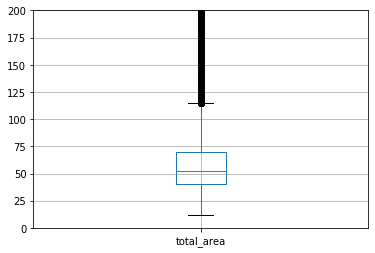

In [26]:
plt.ylim(0, 200)
df.boxplot('total_area')
plt.show()

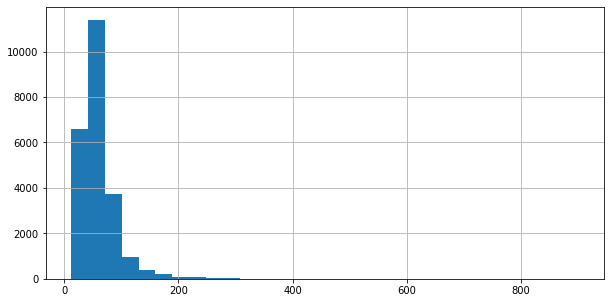

In [27]:
df['total_area'].hist(bins=30, figsize=(10, 5))

Как мы видим из гистограмм, нормальное распределение значений в диапазоне от 115 до 150 кв.м. Большинство значений входит в диапазон от 40 до 70 кв.м. Всё что за пределами - можно считать выбросами (>150 кв.м).
Построим гистограмму в диапазоне 12-150 кв.м.

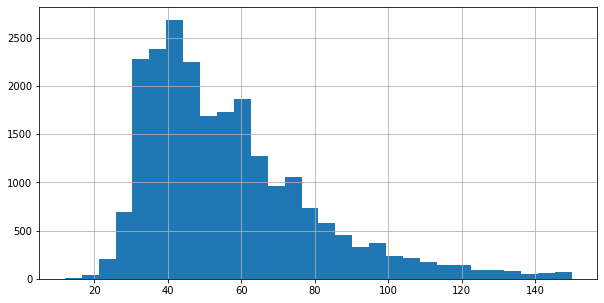

In [28]:
df['total_area'].hist(bins=30, figsize=(10,5), range=(12,150))

In [29]:
df['last_price'].describe()

count       23485.000
mean      6553103.816
std      10926838.543
min         12190.000
25%       3440000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

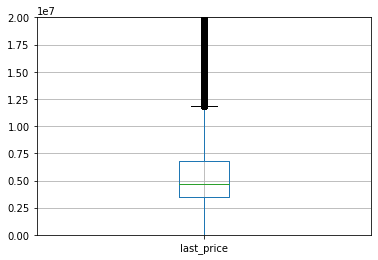

In [30]:
plt.ylim(0, 20000000)
df.boxplot('last_price')
plt.show()

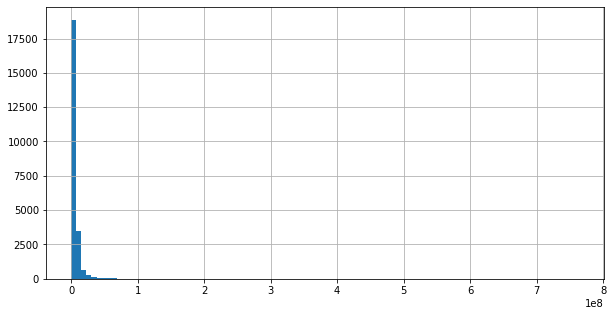

In [31]:
df['last_price'].hist(bins=100, figsize=(10, 5))

Как мы видим из гистограмм, нормальное распределение значений в диапазоне от 0,129 до 12 млн. Большинство значений входит в диапазон от 3,4 до 7 млн. Всё что за пределами - можно считать выбросами (>20 млн). Минимальная цена также выглядит подозрительной. Исследуем квартиры с минимальными ценами.

In [32]:
df.sort_values(by='last_price').head()[['last_price', 'total_area', 'locality_name']]

,last_price,total_area,locality_name
8793,12190,109.000,Санкт-Петербург
17456,430000,30.400,Сланцы
14911,430000,54.000,посёлок станции Свирь
16274,440000,40.000,деревня Старополье
9581,450000,43.400,деревня Старополье


Только 1 квартира с такой низкой ценой - 12190 за 109 кв.м. В 2019 году таких цен не могло быть.
Остальные квартиры по цене приемлемы, т.к. они расположены не Санкт-Петербурге, а в области - цены там намного ниже.
Построим гистограмму в диапазоне 0,4-20 млн.

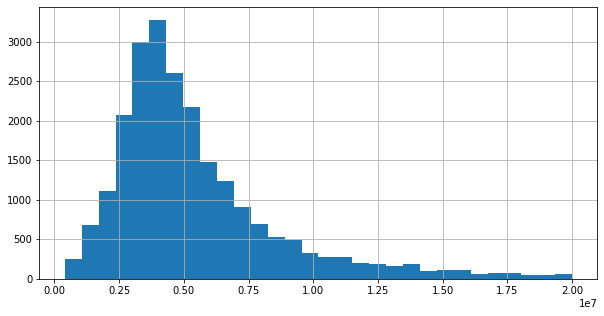

In [33]:
df['last_price'].hist(bins=30, figsize=(10,5), range=(400000,20000000))

In [34]:
df['rooms'].describe()

count   23485.000
mean        2.071
std         1.079
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

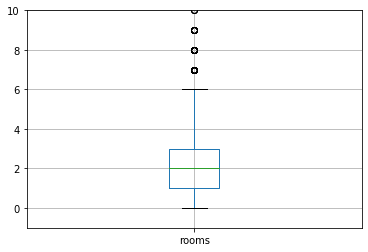

In [35]:
plt.ylim(-1, 10)
df.boxplot('rooms')
plt.show()

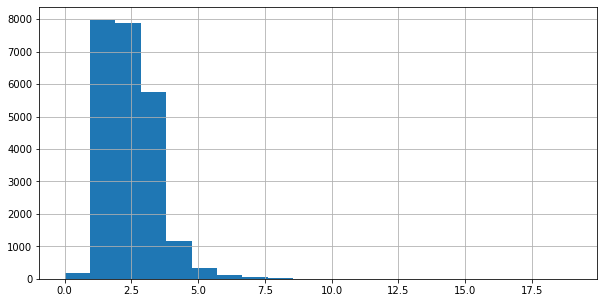

In [36]:
df['rooms'].hist(bins=20, figsize=(10, 5))

Как мы видим из гистограмм, нормальное распределение значений в диапазоне от 0 до 6 комнат. Большинство значений входит в диапазон от 1 до 3 комнат. Всё что за пределами - можно считать выбросами (>6). Построим гистограмму в диапазоне 0-6 комнат.

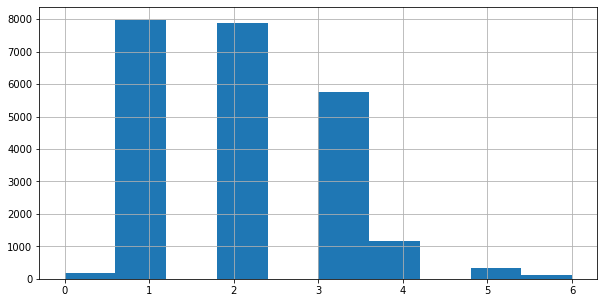

In [37]:
df['rooms'].hist(bins=10, figsize=(10,5), range=(0,6))

Самые популярные квартиры - с 1-2 комнатами, а потом уже идут трёшки.

In [38]:
df['ceiling_height'].describe()

count   23485.000
mean        2.725
std         0.993
min         1.000
25%         2.600
50%         2.650
75%         2.700
max       100.000
Name: ceiling_height, dtype: float64

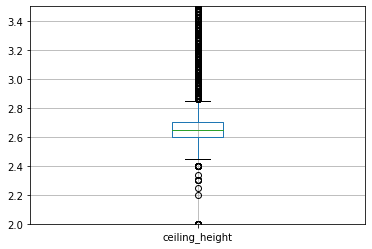

In [39]:
plt.ylim(2, 3.5)
df.boxplot('ceiling_height')
plt.show()

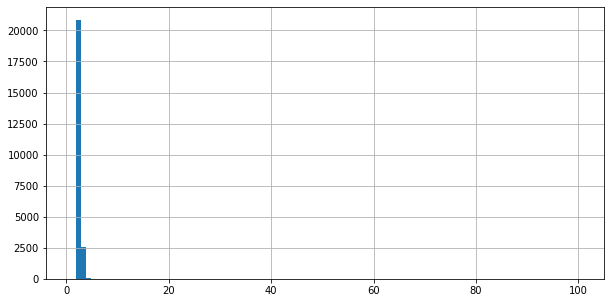

In [40]:
df['ceiling_height'].hist(bins=100, figsize=(10, 5))

Как мы видим из гистограмм, нормальное распределение значений в диапазоне от 2.45 до 2.85 м. Большинство значений входит в диапазон от 2.5 до 2.7 комнат. Всё что за пределами - можно считать выбросами (>3.5). Построим гистограмму в диапазоне 2.45-3.5 м.

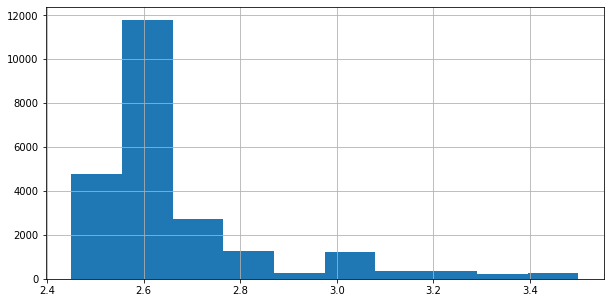

In [41]:
df['ceiling_height'].hist(bins=10, figsize=(10,5), range=(2.45,3.5))

Изучим время продажи квартиры

In [42]:
df['days_exposition'].describe()

count   23485.000
mean      170.172
std       207.186
min         1.000
25%        45.000
50%        95.000
75%       201.000
max      1580.000
Name: days_exposition, dtype: float64

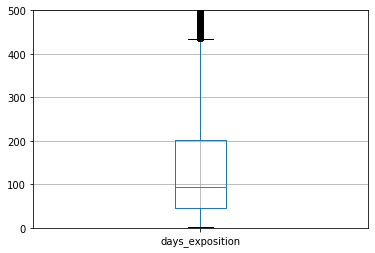

In [43]:
plt.ylim(0, 500)
df.boxplot('days_exposition')
plt.show()

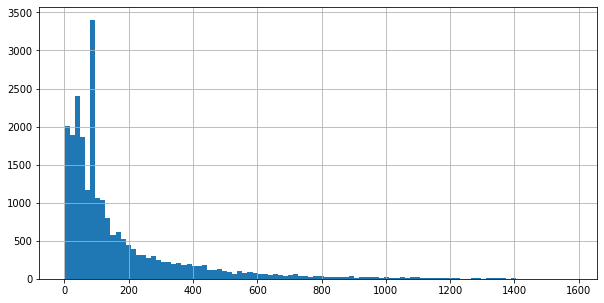

In [44]:
df['days_exposition'].hist(bins=100, figsize=(10, 5))

Как мы видим из гистограмм, нормальное распределение значений в диапазоне от 1 до 430 дней. Большинство значений входит в диапазон от 50 до 200 дней. Всё что за пределами - можно считать выбросами (>430). Постороим гистограмму в диапазоне 1-430 дней.

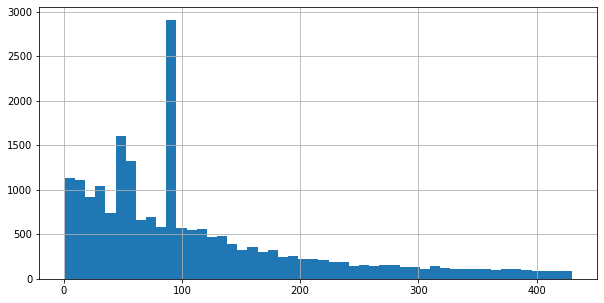

In [45]:
df['days_exposition'].hist(bins=50, figsize=(10,5), range=(1,430))

- Обычно продажа занимает около 100 дней (медианное значение). Это действительно так, если объект в нормальном состоянии, то за 3 месяца можно решить все вопросы, связанные с оформлением сделки, переездом и т.п.
- Очень быстрые продажи - это продажи до 45 дней. Таких объектов было 25%, скорее всего, такие объекты были в лучшем состоянии и, возможно, по цене ниже рыночной.
- Очень долгие продажи - это продажи, которые дольше 200 дней. Таких объектов также 25%, вероятно, они в худшем состоянии и/или их цена выше рыночной.

Уберём редкие и выбивающиеся значения.

In [46]:
clear_df = df[(df['total_area'] <= 150) & 
     (df['last_price'] <= 20000000) &
     (df['rooms'] <= 6) &
     (df['ceiling_height'] <= 3.5) &
     (df['days_exposition'] <= 430)].reset_index(drop=True)

In [47]:
clear_df = clear_df[(clear_df['total_area'] >= 12) & 
     (clear_df['last_price'] >= 400000) &
     (clear_df['rooms'] <= 6) &
     (clear_df['ceiling_height'] >= 2.45) &
     (clear_df['days_exposition'] >= 30)].reset_index(drop=True)

In [48]:
round(clear_df['rooms'].count() / df['rooms'].count() * 100, 2)

71.4

Оставили 62% значений. Убрали все аномальные значения.
Посмотрим, как изменились средние значения некоторых параметров.

In [49]:
df[['last_price', 'total_area', 'ceiling_height', 'price_per_meter','days_exposition']].describe()

,last_price,total_area,ceiling_height,price_per_meter,days_exposition
count,23485.000,23485.000,23485.000,23485.000,23485.000
mean,6553103.816,60.359,2.725,99546.942,170.172
std,10926838.543,35.700,0.993,50378.709,207.186
min,12190.000,12.000,1.000,112.000,1.000
25%,3440000.000,40.000,2.600,76696.000,45.000
50%,4650000.000,52.000,2.650,95014.000,95.000
75%,6800000.000,69.800,2.700,114286.000,201.000
max,763000000.000,900.000,100.000,1907500.000,1580.000


In [50]:
clear_df[['last_price', 'total_area', 'ceiling_height', 'price_per_meter','days_exposition']].describe()

,last_price,total_area,ceiling_height,price_per_meter,days_exposition
count,16768.000,16768.000,16768.000,16768.000,16768.000
mean,5319665.435,55.711,2.676,94373.776,132.911
std,3082211.819,21.440,0.165,32913.630,95.221
min,430000.000,12.000,2.450,7963.000,30.000
25%,3369750.000,40.000,2.600,75000.000,61.000
50%,4500000.000,51.000,2.650,93750.000,95.000
75%,6400000.000,66.700,2.700,112099.000,173.000
max,20000000.000,150.000,3.500,387097.000,430.000


Все средние значения уменьшились.

Изучим факторы, которые влияют на стоимость квартиры.
Выведем матрицу диаграмм рассеяния, чтобы изучить зависимость между стоимостью квартиры и её площадью, числом комнат, удалённостью от центра.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa010d04310>,
      dtype=object)

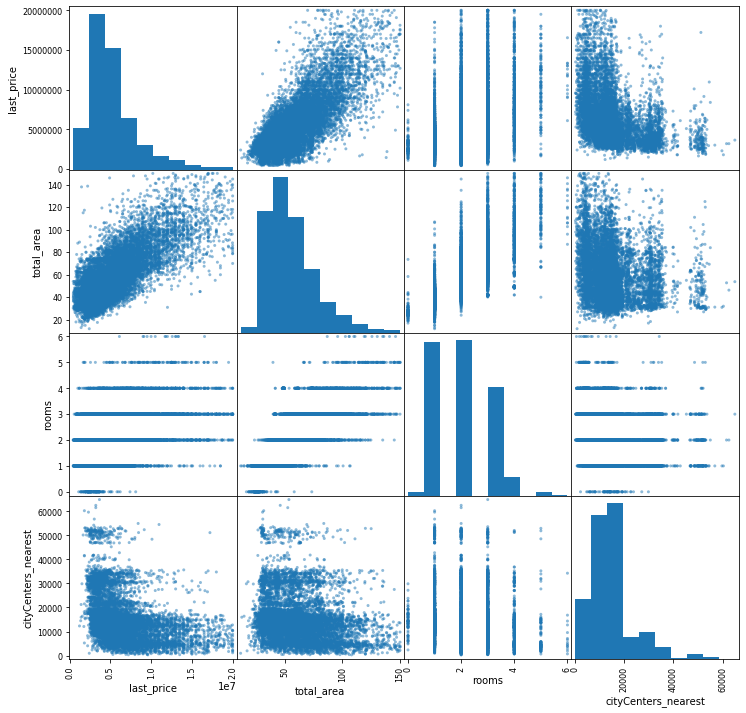

In [51]:
pd.plotting.scatter_matrix(clear_df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(12, 12)) 

In [52]:
clear_df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000,0.759,0.469,-0.346
total_area,0.759,1.000,0.795,-0.183
rooms,0.469,0.795,1.000,-0.122
cityCenters_nearest,-0.346,-0.183,-0.122,1.000


- Больше всего цена зависит от площади квартиры. Это логично - чем больше квадратных метров, тем дороже объект.
- Потом чуть слабее связь между количеством комнат и ценой. Это тоже логично, т.к. количество комнат сильно коррелирует с общей площадью. Больше комнат - больше площадь - дороже объект.
- Корреляция цены и удалённости от центра - отрицательная, что говорит о том, что чем дальше объект, тем он дешевле.

Исследуем стоимость квартир в зависимости от этажа.

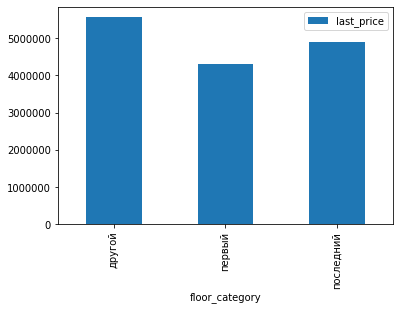

In [53]:
clear_df.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(y='last_price', kind ='bar')

- первый и последний этажи стоят дешевле, чем остальные. Это объясняется тем, что крайние этажи могут быть проблемными из-за подвалов и крыш;
- при этом последние этажи дороже первых, т.к. на последних этаже нет соседей сверху и никто не топает/бегает над головой. Это может цениться больше, чем близость к земле.

Исследуем стоимость квартиры в зависимости от даты размещения объявления.

In [54]:
clear_df[['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']].corr()

,last_price,weekday_exposition,month_exposition,year_exposition
last_price,1.000,-0.015,0.005,0.034
weekday_exposition,-0.015,1.000,0.005,-0.005
month_exposition,0.005,0.005,1.000,-0.296
year_exposition,0.034,-0.005,-0.296,1.000


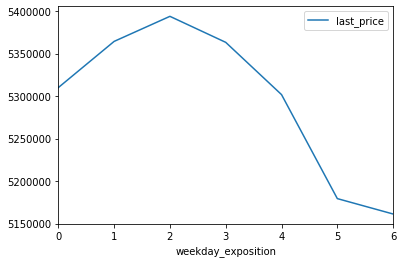

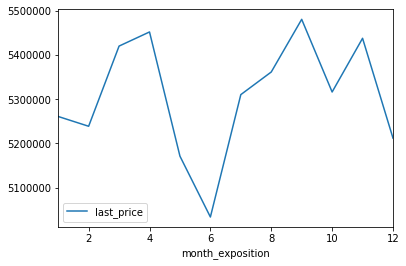

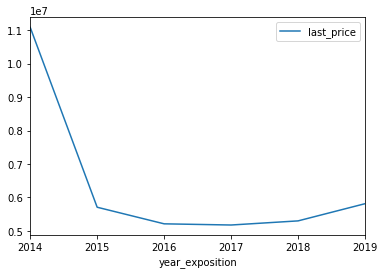

In [55]:
clear_df.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(y='last_price')
clear_df.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(y='last_price')
clear_df.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(y='last_price')

Сильной зависимости цены квартир от даты размещения нет:
- в течение недели средняя стоимость квартиры колеблется в диапазоне 5.15-5.4 млн. При этом стоимость растёт с понедельника до среды, а потом начинает снижаться и резко падать к воскресенью. Вероятно, люди благосклоны делать скидки ближе к выходным дням;
- в течение года средняя стоимость квартир колеблется в примерно таком же диапазоне (5-5.5 млн.). При этом стоимость растёт с начала года до мая, а потом начинает резко снижаться к июне и резко растёт к сентябрю. А к Новому году - снова снижение. Можно объяснить тем, что в декабре-январе люди выставляют самую низкую цену, т.к. спрос небольшой, постепенно он растёт и достигает своего максимума в апреле. Резкое снижение объясняется майскими праздниками и, возможно, подготовкой к дачному сезону (мало кто в это время занимается продажей квартиры), спрос опять же небольшой. Далее после резкого спада цены начинают расти до сентября, а перед Новым годом спрос снова падает;
- сильнее зависимость от года - в 2014 году средняя стоимость квартир приближалась к 11 млн., а затем из-за политической ситуации цены пошли вниз (до 5 млн.) и в течение 5 лет так и не достигли уровня 2014 года.

Но, скорее всего, первые два фактора не влияют на стоимость квартиры и их корреляция со стоимостью квартиры случайна. Можно разместить в день и месяц с высокими ценами, а продать с низкими. Плюс на эти значения оказывает сильное влияние год, в котором было опубликовано объявление.

Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [56]:
top_10_localities = clear_df['locality_name'].value_counts().head(10)

In [57]:
clear_df.query('locality_name in @top_10_localities.index')\
.pivot_table(index='locality_name', values='price_per_meter')\
.sort_values(by='price_per_meter', ascending=False)

,price_per_meter
locality_name,
Санкт-Петербург,109112.339
Пушкин,101563.357
деревня Кудрово,92994.305
посёлок Парголово,89908.857
посёлок Мурино,85527.198
посёлок Шушары,78933.429
Колпино,75029.089
Гатчина,68582.681
Всеволожск,67527.066


Согласно данным из сводной таблицы, 3 самых дорогих населённых пункта - это СПб, Пушкин и Кудрово, и 3 самых дешёвых - Гатчина, Всеволожск и Выборг. Это связано с тем, что:
- СПб - самый крупный город в исследовании;
- Пушкин - исторически ценный город, соответственно, стоимость жилья дороже, чем в других городах области;
- Кудрово - возможно, из-за того, что динамично застраивается и стоимость жилья увеличивается;
- низкая стоимость в последних городах связана с тем, что это небольшие населённые пункты, а также с тем, что происходит отток людей в связи с близостью крупного города.

Определение границы центра Санкт-Петербурга.

In [58]:
clear_df['cityCenters_nearest_km'] = round(clear_df['cityCenters_nearest'] / 1000, 0)

In [59]:
df_spb = clear_df.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index=['cityCenters_nearest_km'], values=['last_price', 'price_per_meter'])
df_spb

,last_price,price_per_meter
cityCenters_nearest_km,,
0.000,8415000.000,109190.667
1.000,10486860.453,130142.907
2.000,9671875.000,128099.993
3.000,8834334.778,116710.691
4.000,9043500.579,121915.018
5.000,9047607.194,127279.489
6.000,8432453.251,128267.923
7.000,7930751.039,124950.000
8.000,7995353.699,121320.370


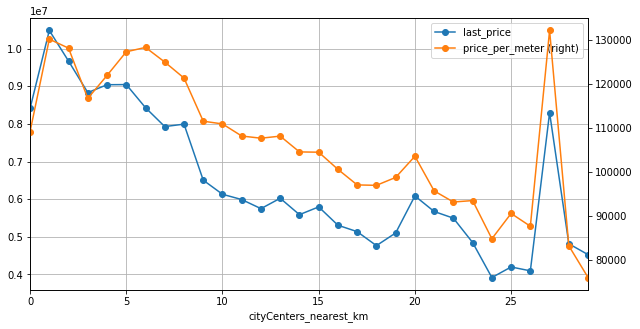

In [60]:
df_spb.plot(kind='line', secondary_y= 'price_per_meter', figsize = (10,5), style = 'o-', grid = True)

Анализируя графики цен, можно выделить границы центра Петербурга - это 0-3 км, далее будут идти дорогие районы с большими квартирами и прекрасными видом из окна (что повлияет на стоимость квартиры).
Всплески в районе 25-30 км - это, скорее всего, какие-то элитные квартиры.
Иследуем основные параметры квартир и факторы, влияющие на стоимость.

In [61]:
df_spb_city_center = clear_df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 3')

In [62]:
df_spb_city_center['total_area'].describe()

count   451.000
mean     79.058
std      27.338
min      12.000
25%      60.000
50%      77.600
75%      97.000
max     150.000
Name: total_area, dtype: float64

In [63]:
round(df_spb_city_center['total_area'].median() / df['total_area'].median(), 2)

1.49

Медианная площадь квартир в центре на 49% больше, чем в целом по городу.

In [64]:
df_spb_city_center['last_price'].describe()

count        451.000
mean     9426147.002
std      3667919.837
min      2400000.000
25%      6800000.000
50%      8750000.000
75%     11700000.000
max     20000000.000
Name: last_price, dtype: float64

In [65]:
round(df_spb_city_center['last_price'].median() / df['last_price'].median(), 2)

1.88

Средняя стоимость квартир в центре города выше на 88%, чем в целом по городу. Объясняется это расположением и исторической ценностью.

In [66]:
df_spb_city_center['rooms'].describe()

count   451.000
mean      2.749
std       1.063
min       0.000
25%       2.000
50%       3.000
75%       3.000
max       6.000
Name: rooms, dtype: float64

Наибольшая популярность у 2-3 комнатных квартир.

In [67]:
df_spb_city_center['ceiling_height'].describe()

count   451.000
mean      2.921
std       0.292
min       2.500
25%       2.650
50%       2.850
75%       3.155
max       3.500
Name: ceiling_height, dtype: float64

In [68]:
round(df_spb_city_center['ceiling_height'].median() / df['ceiling_height'].median(), 2)

1.08

Средняя высота потолков чуть выше (на 8%), чем в целом по городу.

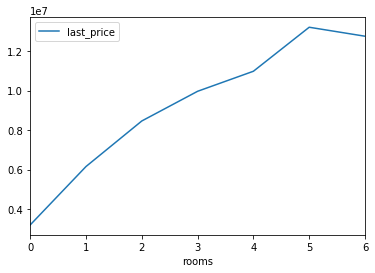

In [69]:
df_spb_city_center.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(y='last_price')

Очевидное заключение: чем больше комнат (тем, скорее всего, больше площадь), тем дороже квартира. Но рост идёт только до 5комнатных квартир, далее стоимость немного снижается. Лучше смотреть ещё и на общую площадь.

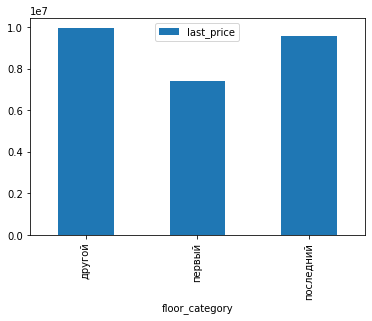

In [70]:
df_spb_city_center.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(y='last_price', kind ='bar')

Первый и последний этажи стоят дешевле, чем остальные. Но стоимость на последнем этаже выше, чем на первом. Возможно, это объясняется красивым видом из окна на город.

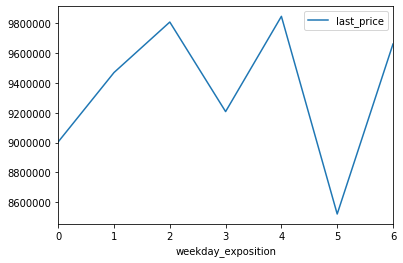

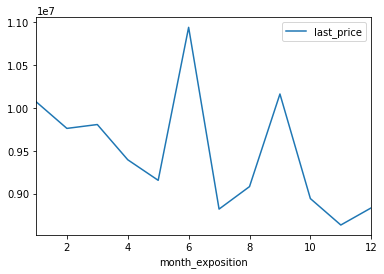

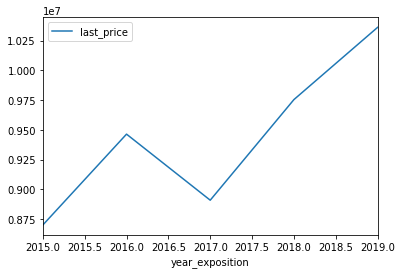

In [71]:
df_spb_city_center.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(y='last_price')
df_spb_city_center.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(y='last_price')
df_spb_city_center.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(y='last_price')

В центре также нет смысла смотреть на день недели и месяц размещения объявления без привязки к году.
Не было квартир с годом размещения 2014, не совсем понятен рост от 2015 до 2016 года и потом падение (какие были предпосылки?!), зато понятен рост с 2017 года - восстановление экономики, адаптация к новым условиям после кризиса 2014 года.

### Вывод

- Был проведён исследовательский анализ данных с помощью различных инструментов (гистограммы, сводные таблицы, срезы).
- Изучены различне параметры квартир, их влияние на стоимость.
- Для исключения влияния выбросов были убраны редкие и аномальные значения.
- Изучены населённые пункты с наибольшим числом объявлений.
- Определены границы центра Петербурга (до 3 км) и проанализирован сегмент квартир в центре.

## Общий вывод

В ходе данного исследования были сделаны следующие шаги:
- 1) предварительный анализ показал большое количество пропусков в разных столбцах, которые были изучены и заполнены медианными значениями. Это столбцы с высотой потолка, жилой площадью, площадью кухни, сроком размещения. Если доля пропусков была крайне мала (менее 0.5%), то такие строки удалялись (столбцы с кол-вом этажей и названием населённого пункта).
- 2) далее были добавлены расчётные столбцы для более детального анализа данных - цена квадратного метра, классификация этажей, день недели, месяц, году публикации.
- 3) основная часть исследования была в шаге 3 - Исследовательский анализ, в ходе которого были сделаны следующие выводы:
 - на стоимость квартиры влияют общая площадь и количество комнат (чем больше, тем дороже), удалённость от центра (чем дальше, тем дешевле);
 - самые популярные объекты - это 1-2 комнатные квартиры;
 - среднее время продажи квартиры - около 100 дней;
 - самые дорогие населённые пункты - Петербург, Пушкин и Кудрово. Они динамично развиваются и застраиваются;
 - были найдены некоторые отличия в центре города по сравнению со всей выборкой:
     - медианное значение общей площади в центре на 49% больше - 77.6 кв.м. против 52 кв.м.;
     - медианное значение стоимости квартиры в центре на 88% больше - 8.75 млн. против 4.65 млн.;
     - медианное значение комнат в центре больше - 3 комнаты против 2;
     - медианное значение высоты потолка на 8% больше - 2.85 против 2.65;
     - медианное значение количества дней продаж одинаковое - 95;
     - медианное значение стоимость за 1 кв. м. на 21% больше - 114 тыс. против 95 тыс.     